In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas
print('pandas: %s' % pandas.__version__)

pandas: 0.24.2


In [70]:
df = pd.read_excel('data.xlsx')
df = df[(df['CLND_MONTH']<=202002) & (df['DIST_TYPE']=='ABO')]
df.index = df['CLND_DATE']
df.head()

,CLND_MONTH,CLND_DATE,DIST_TYPE,FORCESIZE,RECRUITMENT,RENEWAL_COUNT
CLND_DATE,,,,,,
2014-01-01,201401,2014-01-01,ABO,2063155,56511.0,82651.0
2014-02-01,201402,2014-02-01,ABO,2094186,75686.0,93288.0
2014-03-01,201403,2014-03-01,ABO,2074496,61755.0,117753.0
2014-04-01,201404,2014-04-01,ABO,2046839,55632.0,113471.0
2014-05-01,201405,2014-05-01,ABO,2021661,53679.0,106663.0


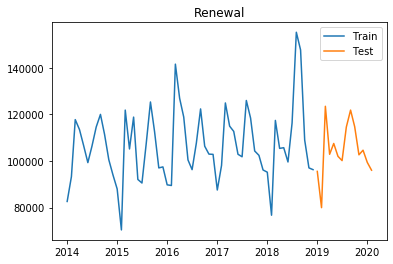

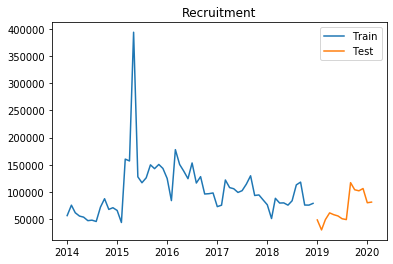

In [71]:
train = df[0:60]
test = df[60:]

# plt.figure(figsize=(9, 6))
# plt.subplot(2,1,1)
plt.plot(train.index, train['RENEWAL_COUNT'], label='Train')
plt.plot(test.index, test['RENEWAL_COUNT'], label='Test')
plt.title('Renewal')
plt.legend()
plt.show()

# plt.figure(figsize=(9, 6))
# plt.subplot(2,1,2)
plt.plot(train.index, train['RECRUITMENT'], label='Train')
plt.plot(test.index, test['RECRUITMENT'], label='Test')
plt.title('Recruitment')
plt.legend()
plt.show()

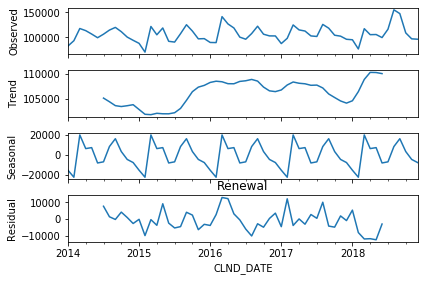

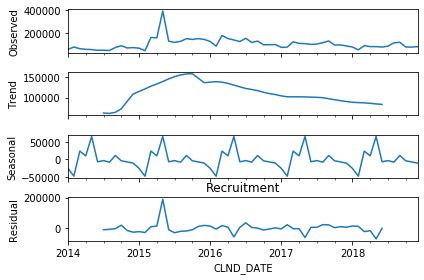

In [72]:
import statsmodels.api as sm
 
sm.tsa.seasonal_decompose(train['RENEWAL_COUNT']).plot()
result = sm.tsa.stattools.adfuller(train['RENEWAL_COUNT'])
plt.title('Renewal')
plt.show()

sm.tsa.seasonal_decompose(train['RECRUITMENT']).plot()
result = sm.tsa.stattools.adfuller(train['RECRUITMENT'])
plt.title('Recruitment')
plt.show()


C:\Users\cnu0748s\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


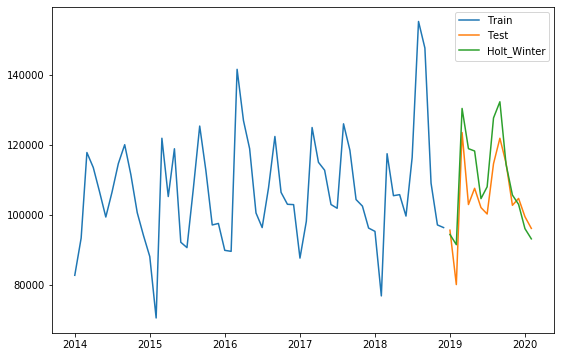

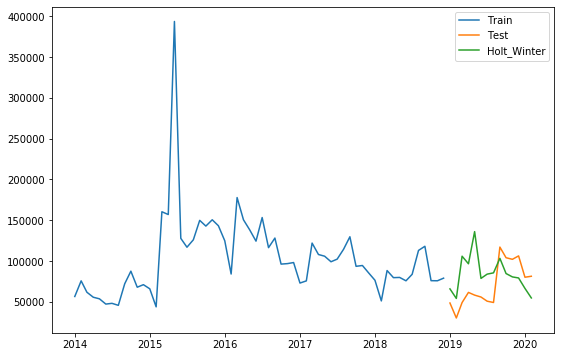

,FORCESIZE,RENEWAL_COUNT,RECRUITMENT,Holt_Winter_Renewal,Holt_Winter_Recruitment
CLND_DATE,,,,,
2019-01-01,2260345,95548.0,48544.0,94331.683284,65856.110724
2019-02-01,2236649,80001.0,30198.0,91412.584455,54150.204137
2019-03-01,2200662,123471.0,49075.0,130355.340645,105911.291453
2019-04-01,2182958,102884.0,61535.0,118855.593217,96628.515100
2019-05-01,2158528,107526.0,58222.0,118186.077228,136043.953466
2019-06-01,2136241,102012.0,55872.0,104571.598718,78702.603336
2019-07-01,2098641,100179.0,50774.0,107958.529189,83933.216134
2019-08-01,2026701,114562.0,49176.0,127634.988578,85502.118437
2019-09-01,2021578,121831.0,117104.0,132263.348648,103291.671047


In [73]:
from statsmodels.tsa.api import ExponentialSmoothing
 
y_hat = test[['FORCESIZE','RENEWAL_COUNT','RECRUITMENT']].copy()


fit_RN = ExponentialSmoothing(np.asarray(train['RENEWAL_COUNT']), seasonal_periods=12, trend='add', seasonal='add', ).fit()
y_hat['Holt_Winter_Renewal'] = fit_RN.forecast(len(test))
plt.figure(figsize=(9, 6))
plt.plot(train['RENEWAL_COUNT'], label='Train')
plt.plot(test['RENEWAL_COUNT'], label='Test')
plt.plot(y_hat['Holt_Winter_Renewal'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

fit_RC = ExponentialSmoothing(np.asarray(train['RECRUITMENT']), seasonal_periods=12, trend='add', seasonal='add', ).fit()
y_hat['Holt_Winter_Recruitment'] = fit_RC.forecast(len(test))
plt.figure(figsize=(9, 6))
plt.plot(train['RECRUITMENT'], label='Train')
plt.plot(test['RECRUITMENT'], label='Test')
plt.plot(y_hat['Holt_Winter_Recruitment'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
y_hat